<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Projeto Proposto 
</h1>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este projeto baseia-se no Estudo das Técnicas de Estatística Probabilística. O intuito é analisar os resultados do ENEM no estado de São Paulo do ano de 2019.  </i>       
</p>  

> CONSULTAR:

https://medium.com/turing-talks/turing-talks-15-fundamentos-de-probabilidade-para-machine-learning-73dd3202e4c5

https://www.youtube.com/watch?v=qBigTkBLU6g&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&ab_channel=StatQuestwithJoshStarmer



# <font color='red' style='font-size: 40px;'>Library and Data </font>

In [1]:
# Convencionais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
enem_sp = pd.read_csv('enem_2019_tratado.csv', sep = ',', encoding='iso-8859-1')
print(enem_sp.shape)
enem_sp.head()

(499940, 28)


,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


In [3]:
enem_guarulhos = enem_sp.loc[enem_sp['NO_MUNICIPIO_RESIDENCIA'] == 'Guarulhos']
print(enem_guarulhos.shape)
enem_bauru = enem_sp.loc[enem_sp['NO_MUNICIPIO_RESIDENCIA'] == 'Bauru']
print(enem_bauru.shape)

(15647, 28)
(4171, 28)


# <font color='red' style='font-size: 40px;'>1.0) Conceitos Fundamentais </font>

> CONSULTAR: 

https://medium.com/turing-talks/turing-talks-15-fundamentos-de-probabilidade-para-machine-learning-73dd3202e4c5

https://www.youtube.com/watch?v=B1v9OeCTlu0&list=PLvxOuBpazmsOGOursPoofaHyz_1NpxbhA&ab_channel=jbstatistics

## 1.1) Introdução 

<img src='./img199.png' width='70%'>
<img src='./img200.png' width='70%'>



## 1.2) Conceitos Probabilísticos

>1. Experimento: O que está sendo estudado

<img src='./img210.png' width='70%'>

>2. Espaço Amostral: É o conjunto de TODOS os resultados possíveis do experimento.

<img src='./img202.png' width='70%'>
<img src='./img203.png' width='70%'>

>3. Evento: É um conjunto de resulados de um experimento.

<img src='./img204.png' width='70%'>
<img src='./img205.png' width='70%'>
<img src='./img206.png' width='70%'>
<img src='./img11.png' width='70%'>

> 4. Probabilidade: é um valor entre 0 e 1. A soma das probabilidades de todos os resultados possívies do experimento deve ser igual a 1.

<img src='./img207.png' width='70%'>
<img src='./img208.png' width='70%'>

>5. Processos Determinísticos: São processos que não utilizam da Aleatoriedade. Dada uma mesma entrada, apresenta sempre a mesma saída.
    
>6. Processos Estocásticos: São processos que utilizam da Aleatoriedade. Dada uma mesma entrada, a saída pode variar.



## 1.3) Lei dos Grandes Números

> 1. As saídas de cada experimento parecem imprevisíveis, mas quando se analisa um grande número de experimentos, um padrão emerge.

> 2. De acordo com a LGN, a média aritmética dos resultados da realização da mesma experiência repetidas vezes tende a se aproximar do valor esperado à medida que mais tentativas se sucederem. Em outras palavras, quanto mais tentativas são realizadas, mais a probabilidade da média aritmética dos resultados observados irá se aproximar da probabilidade real.

> 3. Exemplo Cassino

    Considere um caso particular de um jogo de roleta em um cassino. Embora o cassino possa perder dinheiro em uma única rodada de uma roleta, os seus ganhos tenderão a se aproximar de uma probabilidade da média aritmética dos resultados observados depois de um grande número de rodadas. De outra forma, qualquer série de vitórias de um apostador será superada pelos parâmetros do jogo depois de algumas rodadas.

> 4. Exemplo Sorteio de Bolas

    Imagine uma experiência com uma urna contendo bolas brancas e pretas em uma certa proporção. Imagine um sorteio de bolas da urna, em que uma pessoa retira uma bola de olhos fechados e outra pessoa anota a cor da bola e devolve a bola para a urna. Várias bolas são retiradas sucessivamente. Se a experiência for realizada repetidas vezes, a frequência relativa de bolas pretas sempre irá convergir para um determinado número. Esse número é a proporção de bolas pretas contidas na urna.

    Se a urna tiver a mesma quantidade de bolas brancas e pretas, a porcentagem de vezes que as bolas pretas serão sorteadas irá convergir para o 50%. Do mesmo modo, se a urna tiver três bolas brancas e sete bolas pretas, a porcentagem de vezes que as bolas pretas serão sorteadas irá convergir para é 70%.

> 5. Exemplo Lançamento de um Dado

    Chamada de "Primeiro Teorema Fundamental de Probabilidade", a LGN é derivada da análise de jogos de azar como sorteio de bilhetes de loteria ou arremesso de dados. Um dado não viciado de seis lados pode cair 1, 2, 3, 4, 5 ou 6 em uma única jogada, todos com igual probabilidade. É possível calcular o valor médio de um lance de um dado não viciado de seis lados. Depois de várias jogadas, um a cada seis lances cairá 1, um a cada seis lances cairá 2 e assim por diante com todos os seis resultados possíveis.

    Embora nenhum lado tenha o número 3,5 e nenhum lance resulte no valor 3,5, a LGN determina que a média dos lances de um dado não viciado de seis lados irá se aproximar cada vez mais de 3,5 depois de um grande número de jogadas.



# <font color='red' style='font-size: 40px;'>2.0) Fórmulas </font>

> CONSULTAR: 

https://www.youtube.com/watch?v=B1v9OeCTlu0&list=PLvxOuBpazmsOGOursPoofaHyz_1NpxbhA&ab_channel=jbstatistics

## 2.1) Probabilidade Clássica ou À Priori

> CONSULTAR:

https://www.youtube.com/watch?v=twlpc-HEVZ4&list=PLDoqBsM6cBJaF_1v5o_svUOaKo_fMZ2mt&index=5&ab_channel=R%2CEstat%C3%ADsticaeAprendizadodeM%C3%A1quina

> A probabilidade de ocorrer o evento A.

<img src='./img209.png' width='70%'>

# $$P(A) = \frac {N(A)}{N(E)}$$

onde 

$P(A)$ = Probabilidade de Ocorrência de um Evento A

$N(A)$ = Número de Eventos da Ocorrência

$N(E)$ = Número de Eventos Possíveis 


In [4]:
# EX: Probabilidade de sair um número par no lançamento de um dado:
# A = {2, 4, 6} -> n(A) = 3
# E = {1, 2, 3, 4, 5, 6} -> n(E) = 6

P = 3/6 
print(P)

0.5


<img src='./img12.png' width='70%'>

In [5]:
def probabilidade(A, E):
    resultado = (A/E) * 100
    print(f'{round(resultado, 2)} %')

In [6]:
# Probabilidade de retirar um vestibulando de Guarulhos
probabilidade(enem_guarulhos.shape[0], enem_sp.shape[0])

# Probabilidade de retirar um vestibulando de Bauru
probabilidade(enem_bauru.shape[0], enem_sp.shape[0])

3.13 %
0.83 %


In [7]:
def probabilidade_nao_ocorrer(A, E):
    resultado = (1-(A/E)) * 100
    print(f'{round(resultado, 2)} %')

In [8]:
# Probabilidade de não retirar um vestibulando de Guarulhos
probabilidade_nao_ocorrer(enem_guarulhos.shape[0], enem_sp.shape[0])

# Probabilidade de não retirar um vestibulando de Bauru
probabilidade_nao_ocorrer(enem_bauru.shape[0], enem_sp.shape[0])

96.87 %
99.17 %


## 2.2) Probabilidade da União de Eventos

> CONSULTAR:

https://www.youtube.com/watch?v=twlpc-HEVZ4&list=PLDoqBsM6cBJaF_1v5o_svUOaKo_fMZ2mt&index=5&ab_channel=R%2CEstat%C3%ADsticaeAprendizadodeM%C3%A1quina

> A probabilidade de ocorrer o Evento A **ou** o Evento B é igual a probabilidade de ocorrer A **mais** a probabilidade de ocorrer B **menos** a probabilidade de ocorrer A **e** B.

<img src='./img211.png' width='70%'>


# $$P(AUB) = {P(A)}+{P(B)}-{P(A ∩ B)}$$

onde 

P(A U B) = Probabilidade de ocorrer o Evento A ou o Evento B

$P(A)$ = Probabilidade de Ocorrência de um Evento A

$P(B)$ = Probabilidade de Ocorrência de um Evento B

$P(A ∩ B)$ = Probabilidade de Ocorrência de um Evento A e um Evento B

Se A e B forem mutuamente exclusivos, A ∩ B = 0

In [9]:
# Numa comunidade de 1000 habitantes, 400 são sócios de um clube A, 300 de um clube B e 100 de ambos. 
# Qual a probabilidade de uma pessoa escolhida ao acaso ser sócia de A ou de B?

nE = 1000
nA = 400
nB = 300
nA_e_B = 100

PA = 400/1000
PB = 300/1000
PA_e_B = 100/1000

PAB = PA + PB - PA_e_B
PAB

0.6

<img src='./img13.png' width='70%'>

In [10]:
def probabilidade_uniao(A, B, E):
    resultado = (A/E + B/E) * 100
    print(f'{round(resultado, 2)} %')

In [11]:
# Probabilidade de não retirar um vestibulando de Guarulhos ou de Bauru
probabilidade_uniao(enem_guarulhos.shape[0], enem_bauru.shape[0], enem_sp.shape[0])



3.96 %


## 2.3) Probabilidade da Intersecção de Eventos

> CONSULTAR:

https://www.youtube.com/watch?v=twlpc-HEVZ4&list=PLDoqBsM6cBJaF_1v5o_svUOaKo_fMZ2mt&index=5&ab_channel=R%2CEstat%C3%ADsticaeAprendizadodeM%C3%A1quina

> Se dois eventos, A e B, **são independentes entre si** (a ocorrência de um não influência na ocorrência do outro), a probabilidade de ocorrência de A **e** B é igual ao produto de cada um.

<img src='./img213.png' width='70%'>


# $$P(A∩B) = {P(A)}.{P(B)}$$

onde 

$P(A ∩ B)$ = Probabilidade de Ocorrência de um Evento A e um Evento B

$P(A)$ = Probabilidade de Ocorrência de um Evento A

$P(B)$ = Probabilidade de Ocorrência de um Evento B


Se A e B forem mutuamente exclusivos, A ∩ B = 0

In [12]:
# Qual a probabilidade, num lançamento de um dado e uma moeda, de sair um número menor que 3 no dado e face cara na moeda?
nEA = 6
nEB = 2

nA = 2
nB = 1

PA = 2/6
PB = 1/2

P_A_e_B = PA * PB
print(P_A_e_B)

0.16666666666666666


In [13]:
def probabilidade_interseccao(A, B, E):
    resultado = (A/E * B/E) * 100
    print(f'{round(resultado, 2)} %')

In [14]:
# Probabilidade de não retirar um vestibulando de Guarulhos e de Bauru
probabilidade_interseccao(enem_guarulhos.shape[0], enem_bauru.shape[0], enem_sp.shape[0])

0.03 %


## 2.4) Probabilidade Condicional
> CONSULTAR:

https://www.youtube.com/watch?v=jLMT9_svAlA&list=PLDoqBsM6cBJaF_1v5o_svUOaKo_fMZ2mt&index=5&ab_channel=R%2CEstat%C3%ADsticaeAprendizadodeM%C3%A1quina

> A probabilidade de ocorrer o Evento A **condicionada** ao Evento B. Ela é obrigatoriamente um evento dependente. A expressão "dado que" significa que estamos tratando de um Experimento baseado em Probabilidade Condicional.

<img src='./img216.png' width='70%'>

<img src='./img217.png' width='70%'>

# $$P(A|B) = \frac{n(A ∩ B)}{n(B)} = \frac{P(A ∩ B)}{P(B)}$$

onde 

P(A|B)  = Probabilidade de ocorrer o Evento A dado que ocorreu o Evento B

$P(A ∩ B)$ = Probabilidade de Ocorrência de um Evento A e de um Evento B

$P(B)$ = Probabilidade de Ocorrência de um Evento B


In [15]:
# Qual a probabilidade, num lançamento simultâneo de dois dados, aparecerem faces com números ímpares, com a condição de que a soma seja 8?

B = {(2,6), (3,5), (4,4), (5,3), (6,2)}
nB = 5 # 5 chances da Soma ser 8
n_A_e_B = 2 # 2 chances dos números serem ímpares quando a Soma for 8

P_A_cond_B = 2/5
print(P_A_cond_B)

0.4


<img src='./img14.png' width='70%'>

<img src='./img15.png' width='70%'>

In [16]:
def probabilidade_condicional(AB, B):
    resultado = (AB / B) * 100
    print(f'{round(resultado, 2)} %')

In [17]:
# Probabilidade de retirar uma mulher parda
mulher = enem_sp.loc[enem_sp.SEXO == 'F']
mulher_parda = mulher.loc[mulher.RACA == 'parda']
probabilidade_condicional(mulher_parda.shape[0], mulher.shape[0])

30.76 %


## 2.5) Lei da Probabilidade Total

<img src='./img218.png' width='70%'>

> 1. A lei da probabilidade total é usada quando você não sabe a probabilidade de um evento, mas conhece sua ocorrência em vários cenários disjuntos e a probabilidade de cada cenário.

<img src='./img18.png' width='70%'>

<img src='./img19.png' width='70%'>

## 2.6) Teorema Bayesiano

> CONSULTAR:

https://www.youtube.com/watch?v=jLMT9_svAlA&list=PLDoqBsM6cBJaF_1v5o_svUOaKo_fMZ2mt&index=5&ab_channel=R%2CEstat%C3%ADsticaeAprendizadodeM%C3%A1quina

<img src='./img219.png' width='70%'>

<img src='./img220.png' width='70%'>

<img src='./img20.png' width='70%'>

<img src='./img21.png' width='70%'>

* Suponhamos que temos um registro de um paciente com o vetor = [x1, x2, x3...] (Hipertensão, Colesterol Alto e Tosse).

* Desejamos saber a Probabilidade deste paciente ser doente, dado as informações de nosso vetor -> P(C|data)

* Temos que calcular a Probabilidade de , dado que o paciente é Doente, gerarmos um vetor com as mesmas características observadas no vetor deste paciente -> P(data|C)

* Temos que calcular a Probabilidade de um indivíduo ser doente em toda nossa base de dados -> P(C)

* Temos que calcular a Probabilidade de gerarmos um vetor com as mesmas características observadas no vetor deste paciente, mas agora considerando todas as hipóteses (Doentes e Não Doentes) -> P(data)

<img src='./img22.png' width='70%'>

# $$P(Bi|A) = \frac {P(A|Bi).P(Bi)}{\sum_{j}P(A|Bj).P(Bj)} , i = 1, 2...$$

<img src='./img23.png' width='70%'>

<img src='./img24.png' width='70%'>

### Exemplo 1

<img src='./img221.png' width='70%'>
<img src='./img222.png' width='70%'>
<img src='./img223.png' width='70%'>
<img src='./img224.png' width='70%'>
<img src='./img225.png' width='70%'>
<img src='./img226.png' width='70%'>
<img src='./img227.png' width='70%'>


### Exemplo 2

Para entender um pouco melhor como funciona o classificador, vamos a um exemplo rápido:

Digamos que estamos trabalhando no diagnóstico de uma nova doença, e que fizemos testes em 100 pessoas distintas.

Após coletarmos a análise, descobrimos que 20 pessoas possuíam a doença (20%) e 80 pessoas estavam saudáveis (80%), sendo que das pessoas que possuíam a doença, 90% receberam Positivo no teste da doença, e 30% das pessoas que não possuíam a doença também receberam o teste positivo.

Listando esses dados de uma forma mais clara, temos:

    100 pessoas realizaram o teste.
    20% das pessoas que realizaram o teste possuíam a doença.
    90% das pessoas que possuíam a doença, receberam positivo no teste.
    30% das pessoas que não possuíam a doença, receberam positivo no teste.

A pergunta neste caso seria: Se uma nova pessoa realizar o teste e receber um resultado positivo, qual a probabilidade de ela possuir a doença?

**O algoritmo de Naive Bayes consiste em encontrar uma probabilidade a posteriori (possuir a doença, dado que recebeu um resultado positivo), multiplicando a probabilidade a priori (possuir a doença) pela probabilidade de “receber um resultado positivo, dado que tem a doença”.**

Devemos também computar a probabilidade a posteriori da negação (Não possuir a doença, dado que recebeu um resultado Positivo).

Ou seja:

    P(doença|positivo) = 20% * 90%
    P(doença|positivo) = 0,2 * 0,9
    P(doença|positivo) = 0,18
    P(não doença|positivo) = 80% * 30%
    P(não doença|positivo) = 0,8 * 0,3
    P(não doença|positivo) = 0,24

Após isso precisamos normalizar os dados, para que a soma das duas probabilidades resulte 1 (100%).

Para isso, dividimos o resultado pela soma das duas probabilidades.

Exemplo:

    P(doença|positivo) = 0,18/(0,18+0,24) = 0,4285
    P(não doença|positivo) = 0,24/(0,18+0,24) = 0,5714
    0,4285 + 0,5714 = 0,9999.. ou aproximadamente 1.

A fórmula se apresenta desta maneira:

# $P(A|B) = \frac {P(B|A) P(A)} {P(B)} $

Podemos concluir que se o resultado do teste da nova pessoa for positivo, ela possui aproximadamente 43% (0,4285) de chance de estar doente.





# <font color='red' style='font-size: 40px;'>3.0) Eventos </font>

## 3.1) Tipos de Eventos

### Eventos Não Excludentes

>1. Quando podem ocorrer ao mesmo tempo.

>2. Exemplo: jogar um dado e ser 2 e par ao mesmo tempo



### Eventos Excludentes

>1. Quando não podem ocorrer ao mesmo tempo.

>2. Exemplo: jogar um dado e ser 1 e par ao mesmo tempo

### Eventos Independentes

>1. Quando a ocorrência de um evento não afeta o outro.

>2. Exemplo: Jogar um Dado e retirar a face 6. Veja que isso não depende de nada, apenas da própria Probabilidade de retirar a face 6.

# $$P(A ∩ B) = {P(A)}.{P(B)}$$

<img src='./img16.png' width='70%'>
    
    
### Eventos Dependentes

>1. Quando a ocorrência de um evento afeta o outro, ou seja, um tem que ocorrer para que o outro depois ocorra

>2. Exemplo: Tirar Cartas sem Reposição. Suponha que desejamos saber a Probabilidade de retirarmos uma Dama de Paus após a retirada da primeira carta.

# $$P(A ∩ B) != {P(A)}.{P(B)}$$

<img src='./img17.png' width='70%'>

### Exemplo 

<img src='./img213.png' width='70%'>


## 3.2) Quantidade de Eventos

### Um único Evento

>Soma-se as Probabilidades.
     
       Exemplo: Jogar um Dado e ser 1 ou par (eventos indepentes e excludentes): 1/6 + 3/6 = 4/6 
       
>Soma-se as Probabilidades, diminui-se as sobreposições.

        Exemplo: Jogar um dado e ser 2 ou par (eventos independentes e não excludentes): 1/6 + 3/6 - 1/6 = 3/6
        
### Mais de Um Evento 

Multiplica-se as Probabilidades.
    
        Exemplo: Qual a probabilidade de jogar dois dados, e dar 1 e 6 (eventos independentes)?: 1/6 * 1/6 = 1/36
        
Multiplica-se as Probabilidades, diminui-se o Espaço Amostral.
    
        Exemplo: Com 6 cartas na mão(A, 2, 3, 4, 5, 6), qual a probabilidade de no primeiro evento tirar A e no segundo evento tirar 4 (eventos dependentes)?: 1/6 * 1/5 = 1/30





## 3.3) Em Resumo

<img src='./img214.png' width='70%'>
<img src='./img215.png' width='70%'>

# <font color='red' style='font-size: 40px;'> 4.0 Variáveis Aleatórias </font>

## 4.1) O quem são Variáveis Aleatórias?

<img src='./img228.png' width='70%'>
<img src='./img229.png' width='70%'>

## 4.2) Tipos de Variáveis Aleatórias

<img src='./img230.png' width='70%'>



# <font color='red' style='font-size: 40px;'> 5.0 Distribuição de Probabilidade Discreta </font>

> CONSULTAR:

https://www.youtube.com/watch?v=4F2dTdIGkdg&list=PLovxQRJ6ihin1WjwWkYUBcvZu4ewt_Qns&ab_channel=ProbabilidadeeEstat%C3%ADsticaUFRGS

https://www.youtube.com/watch?v=oHcrna8Fk18&list=PLvxOuBpazmsNIHP5cz37oOPZx0JKyNszN&ab_channel=jbstatistics

<img src='./img290.jpg' width='70%'>

* Distribuições para Variáveis Discretas (Inteiras ou Enumeráveis)

<img src='./img25.png' width='70%'>

<img src='./img26.png' width='70%'>

<img src='./img27.png' width='70%'>



### Média de Variáveis Discretas (Esperança)
# $$\mu = \sum x.P(x) = E(x)$$

### Variância de Variáveis Discretas 
# $$\sigma^2 = \sum(X_i-\mu)^2.P(x)$$

### Desvio Padrão de Variáveis Discretas

# $$\sigma = \sqrt \sigma^2 $$

## 5.1) Distribuição de Bernoulli

> CONSULTAR: 

https://towardsdatascience.com/7-statistical-distributions-that-every-data-scientist-should-know-with-intuitive-explanations-bf967db81f0b

https://www.youtube.com/watch?v=qcmcf5V2YBs&list=PLDoqBsM6cBJaF_1v5o_svUOaKo_fMZ2mt&index=2&ab_channel=R%2CEstat%C3%ADsticaeAprendizadodeM%C3%A1quina

http://www.de.ufpb.br/~tarciana/MPIE/Aula7.pdf


<img src='./img231.png' width='70%'>
<img src='./img232.png' width='70%'>
<img src='./img233.png' width='70%'>
<img src='./img234.png' width='70%'>
<img src='./img235.png' width='70%'>
<img src='./img236.png' width='70%'>


## 5.2) Distribuição Binomial

> CONSULTAR: 

https://towardsdatascience.com/7-statistical-distributions-that-every-data-scientist-should-know-with-intuitive-explanations-bf967db81f0b

https://www.youtube.com/watch?v=qcmcf5V2YBs&list=PLDoqBsM6cBJaF_1v5o_svUOaKo_fMZ2mt&index=2&ab_channel=R%2CEstat%C3%ADsticaeAprendizadodeM%C3%A1quina

https://www.voitto.com.br/blog/artigo/distribuicao-binomial

http://www.de.ufpb.br/~tarciana/MPIE/Aula7.pdf


> 1. A Distribuição Binomial mede a Probabilidade de termos k sucessos em n ensaios.

> 2. Um evento **binomial** é caracterizado pela possibilidade de ocorrência de apenas duas categorias. Exemplo: Verdadeiro ou falso; Cara ou coroa; Sucesso ou fracasso.

> 3. Deve-se ter a realização de $n$ ensaios idênticos.

> 4. Os ensaios são independentes.

> 5. A probabilidade de sucesso deve ser a mesma em cada ensaio. 

<img src='./img237.png' width='70%'>
<img src='./img238.png' width='70%'>
<img src='./img239.png' width='70%'>
<img src='./img240.png' width='70%'>

### Fórmula para Probabilidade

# $$P(k)=\frac{n!}{k!(n - k)!} p^k q^{n-k} = \binom{n}{k} p^k q^{n-k}$$

Onde:

$p$ = probabilidade de sucesso

$q = (1 - p)$ = probabilidade de fracasso

$n$ = número de eventos estudados

$k$ = número de eventos desejados que tenham sucesso


In [18]:
from scipy.stats import binom
# Probabilidade de retirar 4 mulheres num total de 10 amostras
mulher_enem = enem_sp.loc[enem_sp.SEXO == 'F']

probabilidade = binom.pmf(4, 10, mulher_enem.shape[0]/enem_sp.shape[0]) 
print(probabilidade) 

0.13014261971434243


In [19]:
# Probabilidade de retirar pelo menos 1 mulher num total de 10 amostras

probabilidade = 1 - binom.pmf(0, 10, mulher_enem.shape[0]/enem_sp.shape[0]) 
print(probabilidade) 

0.9998304692157152


In [20]:
# Probabilidade de retirar mais do que 3 mulher num total de 10 amostras

probabilidade = 1-(binom.pmf(0, 10, mulher_enem.shape[0]/enem_sp.shape[0])+
binom.pmf(1, 10, mulher_enem.shape[0]/enem_sp.shape[0])+
binom.pmf(2, 10, mulher_enem.shape[0]/enem_sp.shape[0])+
binom.pmf(3, 10, mulher_enem.shape[0]/enem_sp.shape[0])
)
print(probabilidade) 

probabilidade = 1 - binom.cdf(3, 10, mulher_enem.shape[0]/enem_sp.shape[0])
print(probabilidade) 

0.929117468512205
0.929117468512205


In [ ]:
n = 10
p = 2/10

## 5.3) Distribuição de Poisson

> CONSULTAR: 

https://towardsdatascience.com/7-statistical-distributions-that-every-data-scientist-should-know-with-intuitive-explanations-bf967db81f0b

https://www.youtube.com/watch?v=qcmcf5V2YBs&list=PLDoqBsM6cBJaF_1v5o_svUOaKo_fMZ2mt&index=2&ab_channel=R%2CEstat%C3%ADsticaeAprendizadodeM%C3%A1quina

https://www.voitto.com.br/blog/artigo/distribuicao-de-poisson

https://www.inf.ufsc.br/~andre.zibetti/probabilidade/poisson.html

> 1. A Distribuição de Poisson expressa a probabilidade de uma série de eventos ocorrerem num certo período de tempo se estes eventos ocorrem independentemente de quando ocorreu o último evento.

> 2. É empregada para descrever o número de ocorrências num determinado intervalo (tempo, área, volume...).

> 3. A probabilidade do evento ocorrer é a mesma em cada intervalo.

> 4. Número de ocorrências nos intervalos são independentes.

<img src='./img241.png' width='70%'>
<img src='./img242.png' width='70%'>

### Fórmula de Poisson

# $$P(k) = \frac{(\mu)^ke^{-\mu}}{k!}$$

Onde:

$e$ = constante cujo valor aproximado é 2,718281828459045

$\mu$ = representa o número médio de ocorrências em um determinado intervalo de tempo ou espaço (valor esperado)

$k$ = número de sucessos no intervalo desejado


In [21]:
# Um restaurante recebe em média 20 pedidos por hora. 
# Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba 15 pedidos?

from scipy.stats import poisson
media = 20
k = 15
probabilidade = poisson.pmf(k, media)
print('%0.8f' % probabilidade)
# 5% de chance do restaurante receber 15 pedidos em uma hora aleatória

0.05164885


In [22]:
# 2. O número médio de clientes que entram em uma padaria por hora é igual a 20. 
# Obtenha a probabilidade de, na próxima hora, entrarem exatamente 25 clientes.

media = 20
k = 25
probabilidade = (poisson.pmf(25, media))
print('%0.8f' % probabilidade)

0.04458765


In [23]:
# 3. O número de acidentes de carros que ocorrem por dia é de 2 acidentes. 
    
#     1) Qual a probabilidade de ocorrerem 3 em um determinado dia?
    
#     2) Qual a probabilidade de ocorrerem menos de 3 em um determinado dia?
    
#     3) Qual a probabilidade de ocorrerem 3 ou menos em um determinado dia?
    
#     4) Qual a probabilidade de ocorrerem mais de 3 em um determinado dia?

# 1)
media = 2
k = 3
probabilidade = (poisson.pmf(k, media))
print(probabilidade)


# 2)
media = 2
k0, k1 , k2 = 0, 1, 2
contador = 0
for k in range(3):
    contador += (poisson.pmf(k, media))
probabilidade = contador
print(probabilidade)

# 3)
media = 2
k = [0, 1, 2, 3]
probabilidade = poisson.pmf(k, media).sum()
print(probabilidade)

# 4)

media = 2
k = [0, 1, 2, 3]
probabilidade_3_ou_menos = poisson.pmf(k, media).sum()
probabilidade_mais_de_3 = 1 - probabilidade_3_ou_menos
print(probabilidade_mais_de_3)

0.18044704431548356
0.6766764161830635
0.857123460498547
0.14287653950145296


## 5.4) Distribuição Geométrica

https://www.inf.ufsc.br/~andre.zibetti/probabilidade/geometrica.html

> 1. Probabilidade de repetidas tentativas até que o sucesso ocorra.

> 2. São tentativas independentes.

> 3. A probabilidade de sucesso é constante para todas as tentativas

* Fórmula da Probabilidade

# $$ P(k) = p.q^{k-1}$$

$p$ = Probabilidade de sucesso em uma tentativa

$q$ = Probabilidade de fracasso em uma tentativa

$k$ = Variável Aleatória que representa o número de falhas até o sucesso

In [24]:
from scipy.stats import geom 

# Probabilidade de retirar 3 amostras e nenhuma ser mulher

geom.pmf(4, mulher_enem.shape[0]/enem_sp.shape[0])

0.042898029955685306

# <font color='red' style='font-size: 40px;'> 6.0 Distribuição de Probabilidade Contínua </font>

> CONSULTAR:

https://www.youtube.com/watch?v=ec7vw9v2ogQ&list=PLovxQRJ6ihin1WjwWkYUBcvZu4ewt_Qns&index=2&ab_channel=ProbabilidadeeEstat%C3%ADsticaUFRGS

https://www.youtube.com/playlist?app=desktop&list=PLvxOuBpazmsPDZGwqhhjE3KkLWnTD34R0&fbclid=PAAabtrVHDNSGuqVtx8rXdWe4qDQOXc9_UCth4__5Msv2D8c1KsRdpK7wB4VE

<img src='./img290.jpg' width='70%'>

* Distribuições para Variáveis Contínuas

## 6.1) Distribuição Normal ou Gaussiana

> CONSULTAR:

https://towardsdatascience.com/7-statistical-distributions-that-every-data-scientist-should-know-with-intuitive-explanations-bf967db81f0b

https://www.youtube.com/watch?v=3yxfy7-ck30&list=PLDoqBsM6cBJaF_1v5o_svUOaKo_fMZ2mt&index=2&ab_channel=R%2CEstat%C3%ADsticaeAprendizadodeM%C3%A1quina

https://www.voitto.com.br/blog/artigo/distribuicao-normal

<img src='./img243.png' width='70%'>

<img src='./img244.png' width='70%'>

<img src='./img245.png' width='70%'>

<img src='./img246.png' width='70%'>

<img src='./img247.png' width='70%'>

<img src='./img248.png' width='70%'>

<img src='./img249.png' width='70%'>


### O que é?

>1. A distribuição normal é uma das mais utilizadas em estatística. É uma distribuição contínua, onde a distribuição de frequências de uma variável quantitativa apresenta a forma de sino e é simétrica em relação a sua média.
    
>2. Ela pauta-se na busca de Probabilidades Contínuas (Intervalos), logo, não buscamos Probabilidades Discretas (Números Exatos).

>3. É simétrica em torno da média;

>4. A área sob a curva corresponde à proporção 1 ou 100%;

>5. Os extremos da curva tendem ao infinito em ambas as direções e, teoricamente, jamais tocam o eixo $x$;

>6. O desvio padrão define o achatamento e largura da distribuição. Curvas mais largas e mais achatadas apresentam valores maiores de desvio padrão;

>7. A probabilidade sempre será igual à área sob a curva, delimitada pelos limites inferior e superior.
    
    
<img src='./img32.png' width='40%'>
<img src='./img29.jpg' width='50%'>


# $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

### Propriedades de uma Distribuição Normal

<img src='./img30.jpg' width='50%'>
<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

## 6.2) Distribuição Normal Padronizada

### O que é

>1. As tabelas padronizadas foram criadas para facilitar a obtenção dos valores das áreas sob a curva normal e eliminar a necessidade de solucionar integrais definidas.

>2. Para consultarmos os valores em uma tabela padronizada basta transformarmos nossa variável em uma variável padronizada $Z$.

>3. Esta variável $Z$ representa o afastamento em desvios padrões de um valor da variável original em relação à média.

>4. A média é 0, o desvio padrão é 1 e a variância é 1.

<img src='./img250.png' width='70%'>
<img src='./img31.jpg' width='50%'>
<img src='./img35.png' width='500%'>
<img src='./img251.png' width='70%'>
<img src='./img252.png' width='70%'>
<img src='./img253.png' width='70%'>
<img src='./img254.png' width='70%'>
<img src='./img255.png' width='70%'>
<img src='./img256.png' width='70%'>
<img src='./img257.png' width='70%'>
<img src='./img258.png' width='70%'>


# $$Z = \frac{x-\mu}{\sigma}$$

Onde:

$x$ = variável normal com média $\mu$ e desvio padrão $\sigma$. É a Probabilidade que estou buscando.

$\sigma$ = desvio padrão

$\mu$ = média

### Como obter a probabilidade?

>1. A probabilidade é obtida a partir da área sob a curva, delimitada pelos limites inferior e superior especificados. Um exemplo pode ser visto na figura abaixo.    

> 2. Existem duas maneiras para sabermos a probabilidade: utilizando a Tabela Normal Padronizada ou códigos específicos de softwares.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img002.png)   

In [25]:
from scipy.stats import norm

tabela_normal_padronizada = pd.DataFrame(
    [], 
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


### Problema 
Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

### **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img004.png' width='350px'>

In [26]:
media = 1.70
desvio_padrao = 0.1
z = (1.80 - media)/desvio_padrao
z

1.0000000000000009

#### Solução 1 - Utilizando tabela

>1. Para utilizar a tabela, devo ter mente o uso dos index e das colunas.
    
>2. Se meu z tivesse 1 casa decimal, ou seja, fosse 0.1 -> eu iria no index 0.1 e na coluna 0, pois somando os dois daria 0.1 
    
>3. Se meu z tivesse 2 casas decimais, ou seja, fosse 0.15 -> eu iria no index 0.1 e na coluna 0.05, pois somando os dois daria 0.15 
    
>4. Com isso, eu acharia a minha probabilidade através da tabela
    
>5. No caso atual, fui até o index 1 e na coluna 0, pois a soma da 1 que é igual ao valor do nosso z
    
>6. A partir disso, acho a probabilidade em questão

In [27]:
probabilidade = 0.8413
probabilidade

0.8413

#### Solução 2 - Utilizando Scipy

In [28]:
from scipy.stats import norm
norm.cdf(z)

0.8413447460685431

### **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img005.png' width='350px'>

#### Solução 1 - Utilizando tabela

In [29]:
media = 1.70
desvio_padrao = 0.1

z1 = (1.80 - media)/desvio_padrao
print(z1)

z2 = (1.70 - media)/desvio_padrao
print(z2)

1.0000000000000009
0.0


In [30]:
probabilidade_1 = norm.cdf(z1)
print(probabilidade_1)

probabilidade_2 = norm.cdf(z2)
print(probabilidade_2)

0.8413447460685431
0.5


In [31]:
probabilidade_1_menos_2 = probabilidade_1 - probabilidade_2
probabilidade_final = 2 * probabilidade_1_menos_2
probabilidade_final

0.6826894921370863

#### Solução 2 - Utilizando Scipy

In [32]:
z_superior = (1.80 - media)/desvio_padrao
z_inferior = (1.60 - media)/desvio_padrao
print(z_superior)
print(z_inferior)

1.0000000000000009
-0.9999999999999987


In [33]:
probabilidade = norm.cdf(z_superior) - (1 - norm.cdf(z_superior)) #O gráfico é simétrico
print(probabilidade)

probabilidade = norm.cdf(z_superior) - (norm.cdf(z_inferior)) 
print(probabilidade)

0.6826894921370863
0.6826894921370857


### **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img006.png' width='350px'>

#### Solução 1 - Utilizando tabela

In [34]:
probabilidade = 1 - 0.9767
probabilidade

0.023299999999999987

#### Solução 2 - Utilizando Scipy

In [35]:
probabilidade = 1 - norm.cdf(z)
print(probabilidade)

probabilidade = norm.cdf(-z) # Se eu passar um valor negativo, o método cdf entende que quero a probabilidade contrária
print(probabilidade)

0.15865525393145685
0.15865525393145685


## 6.3) Distribuição Binomial - Correção pela continuidade

<img src='./img33.png' width='70%'>
<img src='./img34.png' width='70%'>

### Média

# $$\mu ={n}{p}$$

### Desvio Padrão

# $$\sigma = \sqrt{{n}{p}{q}}$$

Onde:

$n$ = número de tentativas

$p$ = probabilidade de sucesso

$q$ = probabilidade de fracasso

## 6.4) Distribuição Exponencial 

> CONSULTAR:

https://towardsdatascience.com/7-statistical-distributions-that-every-data-scientist-should-know-with-intuitive-explanations-bf967db81f0b

<img src='./img259.png' width='70%'>
<img src='./img260.png' width='70%'>

## 6.5) Testes de Normalidade

> 1. O intuito é testar se nossa amostra segue uma Distribuição Normal ou não.

In [36]:
enem_tupa = enem_sp.loc[enem_sp.NO_MUNICIPIO_RESIDENCIA == 'Tupã']

### Histograma

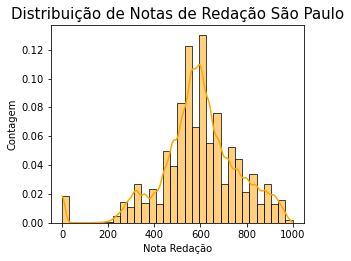

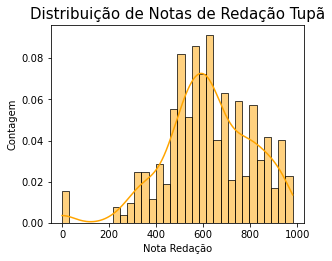

In [37]:
plt.figure(figsize = (10,8))
plt.subplot(2, 2, 1)
sns.histplot(enem_sp, x = 'NOTA_REDACAO', bins= 32, kde = 32, color = 'orange', stat = 'probability')
plt.title('Distribuição de Notas de Redação São Paulo', fontsize = 15)
plt.xlabel('Nota Redação')
plt.ylabel('Contagem')
plt.show()

plt.figure(figsize = (10,8))
plt.subplot(2, 2, 2)
sns.histplot(enem_tupa, x = 'NOTA_REDACAO', bins= 32, kde = 32, color = 'orange', stat = 'probability')
plt.title('Distribuição de Notas de Redação Tupã', fontsize = 15)
plt.xlabel('Nota Redação')
plt.ylabel('Contagem')
plt.show()

* Veja que aparentemente a Distribuição de São Paulo (população) é Normal, ao passo que a Distribuição de Tupã (amostra) aparenta não ser

* Veja que olhando o Histograma, São Paulo parecia ser normal e Tupã não.

* Vendo agora um teste matemático de QQPlot, perceba como os dados se adequam muito mais à reta quando se trata Tupã, ou seja, matematicamente São Paulo não segue uma Distribuição Normal, mas Tupã segue.

### QQPlot

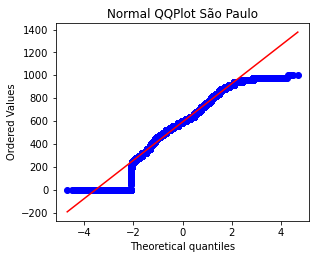

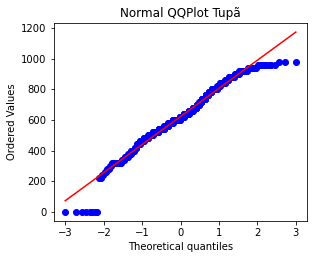

In [38]:
import scipy.stats as stats

plt.figure(figsize = (10,8))
plt.subplot(2, 2, 1)
stats.probplot(enem_sp['NOTA_REDACAO'], dist = 'norm', plot = plt)
plt.title('Normal QQPlot São Paulo')
plt.show()

plt.figure(figsize = (10,8))
plt.subplot(2, 2, 2)
stats.probplot(enem_tupa['NOTA_REDACAO'], dist = 'norm', plot = plt)
plt.title('Normal QQPlot Tupã')
plt.show()

### Teste de Shapiro-Wilk (Limite de 5000 amostras)

> 1. Critérios:

* Nível de Significância de 0.05 ou 5% (MAIS UTILIZADO)

Quando pvalue > 0.05 (Distribuição Normal)

In [39]:
print(f' São Paulo: {stats.shapiro(enem_sp.NOTA_REDACAO)}')
print(f' Tupã: {stats.shapiro(enem_tupa.NOTA_REDACAO)}')

 São Paulo: ShapiroResult(statistic=0.9648149609565735, pvalue=0.0)
 Tupã: ShapiroResult(statistic=0.9733085632324219, pvalue=3.542090354358152e-08)


c:\Users\leova\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


* O Teste de Shaipiro-Wilk não funciona para São Paulo, pois temos um número muito maior do que 5000 amostras.

* Para Tupã, o Teste de Shaipiro-Wilk negou a hipótese de que as Notas de Redação seguem uma Distribuição Normal

### Teste de Kolmogorov_Smirnov

> 1. Critérios:

* Nível de Significância de 0.05 ou 5% (MAIS UTILIZADO)

Quando pvalue > 0.05 (Distribuição Normal)

In [40]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

print(statsmodels.stats.diagnostic.lilliefors(enem_sp.NOTA_REDACAO, dist = 'norm'))
print(statsmodels.stats.diagnostic.lilliefors(enem_tupa.NOTA_REDACAO, dist = 'norm'))


(0.0831243667968013, 0.0009999999999998899)
(0.053966451207192984, 0.0020401155999012818)


* Confirmamos pelo Teste de Kolmogorov_Smirnov que a Distribução de Notas de Redação de São Paulo e Tupã não seguem a Distribuição Normal

# <font color='red' style='font-size: 40px;'> 7.0 Como escolher a Melhor Distribuição? </font>

**A priori**

As distribuições de probabilidade, também conhecidas como modelos ou lei de probabilidade, são muito úteis em modelagem e problemas que exijam uma inferência a partir de uma amostra coletada. Traduzindo, elas facilitam muito a sua vida na hora de tomar uma decisão.

No entanto, dentre tantas uma pergunta frequente é qual distribuição de probabilidade devo utilizar baseado nos dados que eu tenho? Para a maioria dos casos o fenômeno define sua distribuição, basta verificar qual a natureza da sua variável que está sendo analisada, mas também temos ferramentas para definir qual distribuição utilizar baseado em informações extraídas de nossa amostra.

Vejamos então algumas situações e quais são as distribuições mais adequadas para cada caso.

### 7.1) Quando estou trabalhando com dados de contagem

Se você está estudando a contagem de algum evento, como número de peças produzidas, número de folhas por ramo, quantas formigas em um formigueiro e exemplos similares, então provavelmente o uso de uma Poisson para modelar a probabilidade deste evento seja adequado. Por exemplo, se eu quero estudar a produção de café de determinada plantação, coleto dados de quantos grãos foram coletados de cada pé e calculo uma média de quantos grãos cada pé produziu. Com isso é possível verificar, por exemplo, qual a probabilidade de um pé produzir uma quantidade de grãos duas vezes acima da média.

Mas atenção, para utilizar a distribuição de Poisson uma das condições necessárias é que a média e a variância de sua amostra sejam próximas, caso contrário o modelo de Poisson não é adequado. Quando temos média e variância muito distantes, é recomendado utilizar uma Binomial Negativa para lidar com essa dispersão maior dos dados.

### 7.2) Quando estou trabalhando com eventos binários

Antes de tudo é preciso especificar o que são eventos binários. Eventos com apenas duas possibilidades são eventos binários. Por exemplo, o resultado do lançamento de uma moeda só pode ser cara ou coroa. Outro exemplo é considerar respostas do tipo “sim” e “não” como eventos binários, como a resposta à pergunta “Você já experimentou o novo suco de maracujá desta marca?”.

A distribuição a se utilizar neste caso depende muito de como você deseja analisar estes dados. Se seu interesse é verificar, por exemplo, quantas caras eu posso obter em um número específico de lançamentos, daí utilizamos o modelo Binomial. Se você deseja saber quantas caras em sequência eu consigo obter até sair a primeira coroa, daí utilizamos o modelo Geométrico.

No exemplo do suco de maracujá mencionado acima, se entrevistamos, suponha, 100 pessoas e estamos interessados em saber quantas já experimentaram o novo suco de maracujá, então temos que trabalhar com uma binomial. O outro caso é mais raro, mas se o interesse é saber quantas pessoas respondem “não” até eu encontrar a primeira que já experimentou o suco, então este tipo de evento é caracterizado pela distribuição geométrica.

### 7.3) Quando estou trabalhando com médias ou dados numéricos contínuos

Este é talvez o caso mais comum. Primeiramente é preciso deixar claro o que são dados numéricos contínuos. Grosseiramente falando é quando o que estou medindo admite vírgula. Por exemplo, sua altura pode ser 1,69 ou 1,92, números que podem conter casas decimais. Porém, ao contar o número de pessoas em uma festa não é possível obter 893,2 pessoas porque número de pessoas são números inteiros: 1, 2, 3, 4, 5, etc.

Entendido o que são dados contínuos, em geral trabalhamos com a média de alguma variável de interesse. Por exemplo, estamos sempre interessados no custo médio, risco médio, altura média, rendimento médio, média de gols, média de vendas e muitas outras coisas que podemos listar infinitamente aqui. Em estatística há um teorema muito poderoso que diz que a média de qualquer coisa tem distribuição que pode ser aproximada por uma normal sob certas condições. A efeito de curiosidade, essas condições são independência e um número grande de observações. Por isso que a distribuição Normal é tão enfatizada e valorizada nos cursos de estatística.

De fato, a distribuição Normal é a mais apropriada quando trabalhamos com dados contínuos, principalmente se o interesse é a média de alguma variável. Porém é preciso verificar se os dados realmente são normais antes de iniciar qualquer análise. Para isso, veja aqui nosso guia.

### 7.4) E se eu não souber com o que estou trabalhando?!

Isso pode ser a maioria dos casos. Na verdade, nunca sabemos. Quem nos diz são os dados que você coletou. Na prática o que fazemos é supor alguma distribuição e depois verificar se essa distribuição é adequada. Por exemplo, se vou trabalhar com contagem vou supor que meus dados tem distribuição Poisson, mas não posso deixar de verificar se a média e a variância dos dados estão próximas. Depois com o tempo fica mais fácil de fazer essas suposições, mas é sempre importante verificar.

### 7.5) Como verificar a distribuição dos seus dados?

A primeira coisa que deve ser analisada é o tipo de variável: se for discreta (contagem) ou contínua (números que admitem vírgula). Essas duas categorias possuem distribuições específicas de sua natureza, como vimos nos parágrafos anteriores. Depois podemos olhar o histograma de seus dados. A forma do histograma lhe dá muitas informações importantes para poder decidir qual distribuição utilizar. Por fim, podemos utilizar o qq-plot para verificar com maior precisão se estamos supondo a distribuição correta. Para ver um exemplo de como verificar se uma distribuição é Normal, clique aqui.